In [1]:
from regraph import Rule, plot_rule, plot_graph, plot_instance, find_matching
from regraph.primitives import *

import networkx as nx

In [2]:
pattern = nx.DiGraph()
add_nodes_from(pattern, ["gene1", "gene2", "residue"])
add_edges_from(pattern, [("residue", "gene1"), ("residue", "gene2")])

In [3]:
rule = Rule.from_transform(pattern)
rule.inject_merge_nodes(["gene1", "gene2"])
rule.inject_add_node("new_node")
rule.inject_add_edge("residue", "new_node")
rule.inject_clone_node("residue")

('residue1', 'residue1')

{'gene1': array([-1.        ,  0.34734805]), 'gene2': array([ 0.99817516, -0.34978801]), 'residue': array([ 0.01170915, -0.12683485]), 'residue1': array([-0.00988431,  0.12927482])} 


{'gene1': array([-1.        ,  0.34734805]), 'gene2': array([ 0.99817516, -0.34978801]), 'residue': array([ 0.01170915, -0.12683485])} 




/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


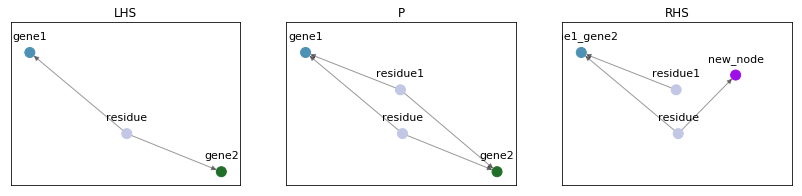

In [4]:
plot_rule(rule)

In [5]:
print(rule.to_commands())

CLONE residue AS residue1.
MERGE [gene2, gene1] AS 'gene1_gene2'.
ADD_NODE new_node {}.
ADD_EDGE residue new_node {}.



In [6]:
g = nx.DiGraph()
add_nodes_from(g, [1, 2, 3, 4, 5, 6])
add_edges_from(g, [(2, 1), (2, 3), (3, 4), (3, 5)])

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


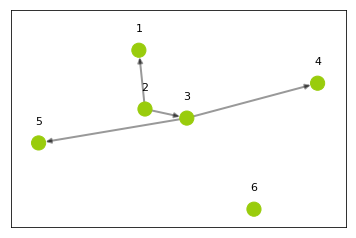

In [7]:
pos = plot_graph(g)

In [8]:
instances = find_matching(g, rule.lhs)

In [9]:
instances

[{'gene2': 1, 'residue': 2, 'gene1': 3},
 {'gene1': 1, 'residue': 2, 'gene2': 3},
 {'residue': 3, 'gene2': 4, 'gene1': 5},
 {'residue': 3, 'gene1': 4, 'gene2': 5}]

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


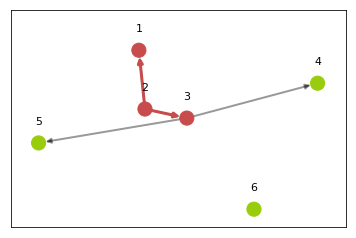

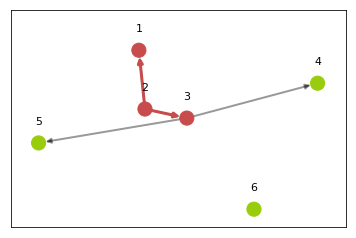

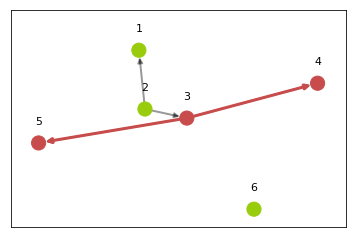

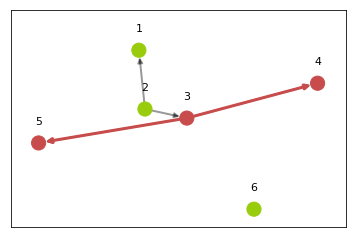

In [10]:
for instance in instances:
    plot_instance(g, rule.lhs, instance, parent_pos=pos)

In [11]:
rule.apply_to(g, instances[0], inplace=True)

(<networkx.classes.digraph.DiGraph at 0x7fc4e60157f0>,
 {'residue': 2,
  'gene1_gene2': '1_3',
  'new_node': 'new_node',
  'residue1': '21'})

In [12]:
parent_pos={k: v for k, v in pos.values() if k in g.nodes()}

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


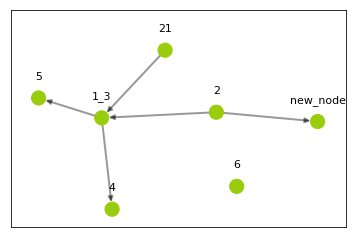

{2: array([0.31515503, 0.14953776]),
 4: array([-0.38984257, -0.77449842]),
 5: array([-0.88680744,  0.28520944]),
 6: array([ 0.45301605, -0.55707951]),
 '21': array([-0.03144439,  0.74026265]),
 '1_3': array([-0.46007669,  0.09569147]),
 'new_node': array([1.        , 0.06087662])}

In [13]:
plot_graph(g, parent_pos={k: v for k, v in pos.values() if k in g.nodes()})

In [14]:
pattern = nx.DiGraph()
add_nodes_from(pattern, ["x", "circle", "square", "dot"])
add_edges_from(pattern, [("x", "dot"), ("circle", "dot"), ("square", "dot")])

In [15]:
rule = Rule.from_transform(pattern)

rule.inject_remove_node("x")
p_new_name, _ = rule.inject_clone_node("circle")
rule.inject_remove_edge(p_new_name, "dot"),
merge_name = rule.inject_merge_nodes([p_new_name, "square"])
rule.inject_add_node("y")
rule.inject_add_edge(merge_name, "y")

{'circle': array([-0.07578215, -0.45886754]), 'square': array([-0.4848725 , -0.04683899]), 'dot': array([-0.43934536, -0.41149033]), 'circle1': array([1.        , 0.91719686])} 


{'x': array([-0.21819786, -0.20957041]), 'circle': array([-0.07578215, -0.45886754]), 'square': array([-0.4848725 , -0.04683899]), 'dot': array([-0.43934536, -0.41149033])} 




/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


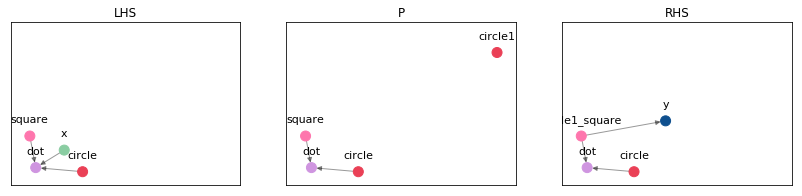

In [18]:
plot_rule(rule)

In [17]:
print(rule.to_commands())

CLONE circle AS circle1.
DELETE_NODE x.
DELETE_EDGE circle1 dot.
MERGE [square, circle1] AS 'circle1_square'.
ADD_NODE y {}.
ADD_EDGE circle1_square y {}.

